# Exploratory Data Analysis (EDA) — CreditPathAI

**Notebook:** `eda_visualization.ipynb`

**Purpose:** Provide thorough exploratory data analysis for the processed CreditPathAI dataset. All plots use `matplotlib` (no seaborn) and include clear explanations.

---


## 0 — Setup

Load libraries and dataset. Edit `DATA_PATH` if needed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

DATA_PATH = '/content/loan_data_final_output.csv'
print('DATA_PATH =', DATA_PATH)

df = pd.read_csv(DATA_PATH)
print('Loaded shape:', df.shape)

df.head()


DATA_PATH = /content/loan_data_final_output.csv
Loaded shape: (9578, 25)


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,...,credit_utilization,annual_inc,debt_to_income_calc,credit_age_years,has_recent_inq,has_past_delinquency,target_default,purpose_debt_consolidation,purpose_educational,purpose_small_business
0,1,0.001189,2.463099,11.350407,0.998505,0.688825,5639.958333,0.353732,0.182704,0,...,0.145575,85000.000385,1.121950,0.432230,0,0,0,True,False,False
1,1,0.001071,-0.438854,11.082143,0.244540,-0.101303,2760.000000,0.495018,1.030602,0,...,1.025163,65000.000073,-0.585293,-0.721230,0,0,0,False,False,False
2,1,0.001357,0.230708,10.373491,-0.141885,-0.759742,4710.000000,-0.397073,-0.730683,1,...,-0.801949,31999.999943,1.589642,0.059770,1,0,0,True,False,False
3,1,0.001008,-0.757022,11.350407,-0.654697,0.030385,2699.958333,0.496321,0.909966,1,...,0.900019,85000.000385,-1.023161,-0.745277,1,0,0,True,False,False
4,1,0.001426,-1.043992,11.299732,0.343326,-1.154806,4066.000000,-0.360663,-0.251586,0,...,-0.304946,80799.999636,-1.197116,-0.198161,0,1,0,False,False,False


## 1 — Target distribution

Check class balance for `target_default`.

target_default
0    8045
1    1533
Name: count, dtype: int64


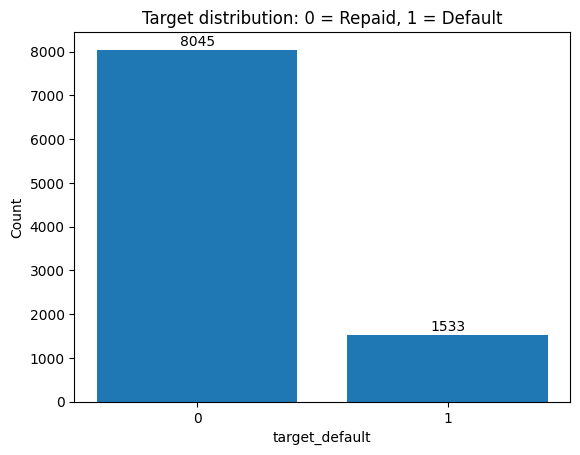

In [3]:
if 'target_default' not in df.columns:
    print('No target_default column found. Run preprocessing first.')
else:
    counts = df['target_default'].value_counts().sort_index()
    print(counts)
    fig, ax = plt.subplots()
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title('Target distribution: 0 = Repaid, 1 = Default')
    ax.set_xlabel('target_default')
    ax.set_ylabel('Count')
    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts.values)*0.01, str(v), ha='center')
    plt.show()


## 2 — Distributions of key numeric features

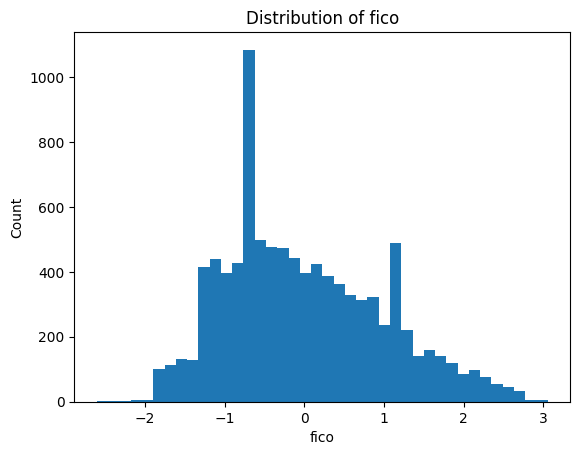

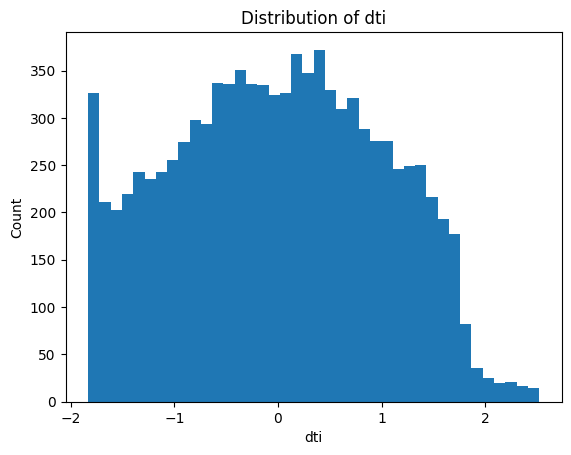

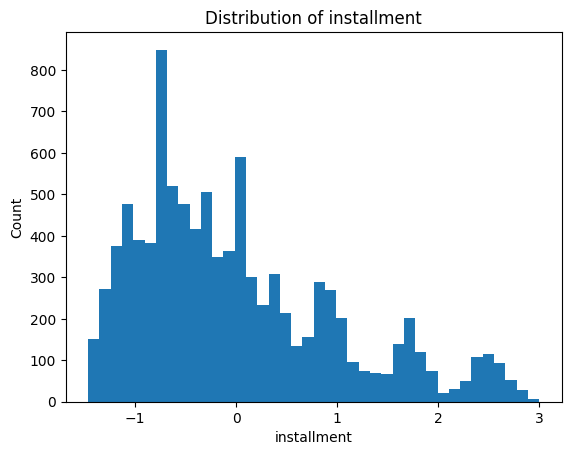

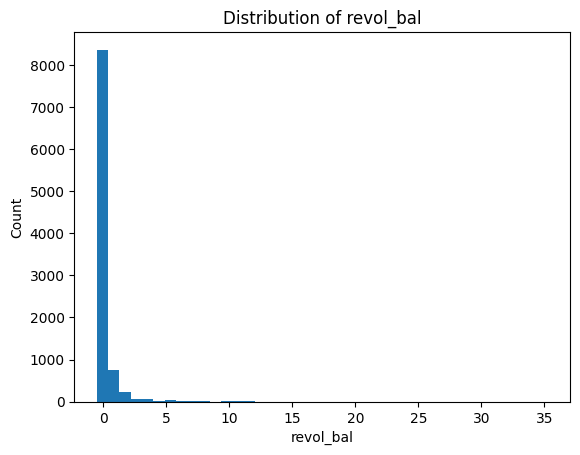

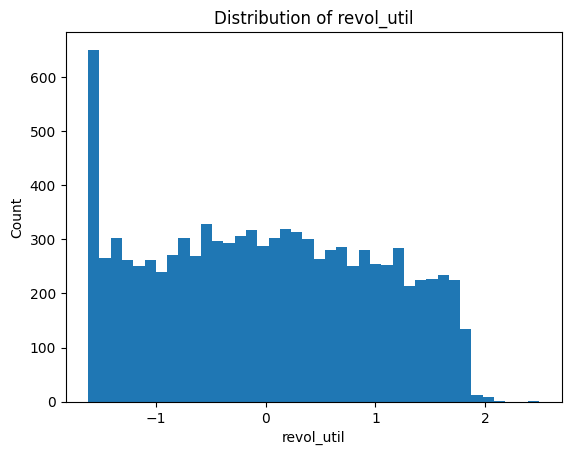

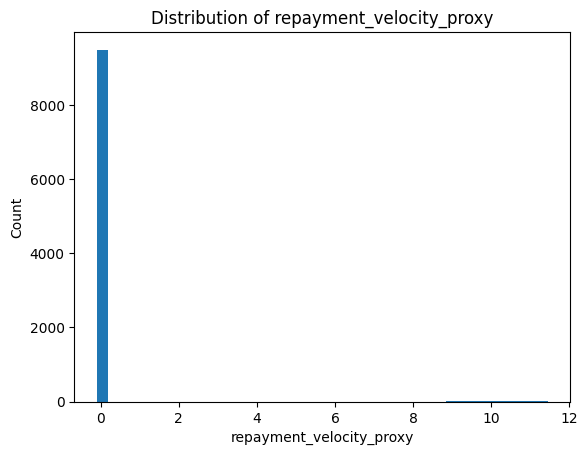

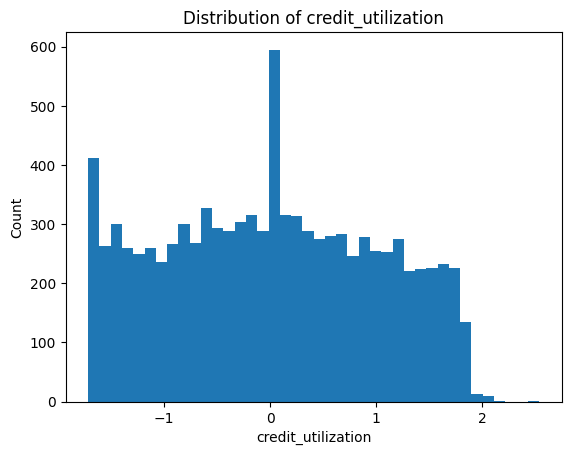

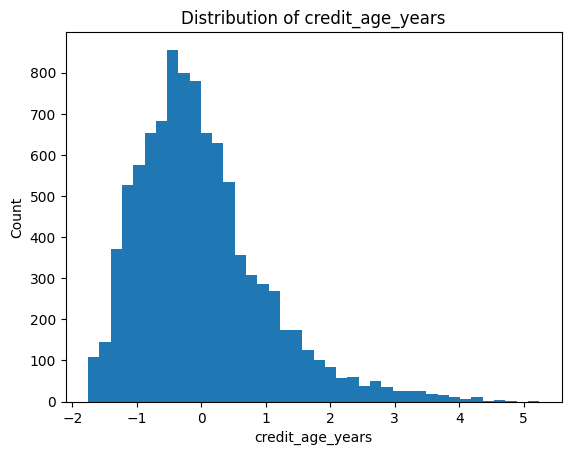

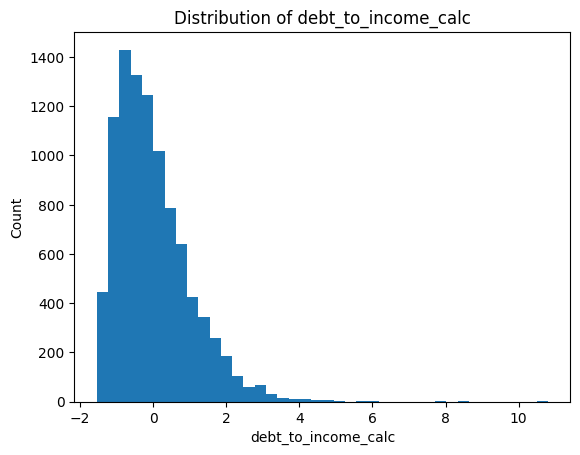

In [4]:
numeric_cols = ['fico','dti','installment','revol_bal','revol_util','repayment_velocity_proxy','credit_utilization','credit_age_years','debt_to_income_calc']
numeric_cols = [c for c in numeric_cols if c in df.columns]
for col in numeric_cols:
    fig, ax = plt.subplots()
    ax.hist(df[col].dropna(), bins=40)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()


## 3 — Feature vs Target (boxplots)

/tmp/ipython-input-2095847711.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['Repaid(0)', 'Default(1)'])


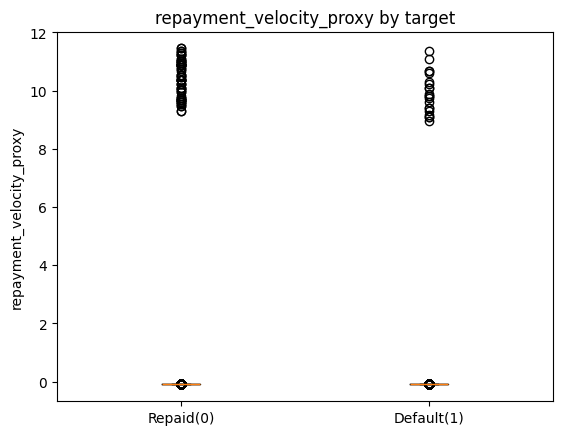

/tmp/ipython-input-2095847711.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['Repaid(0)', 'Default(1)'])


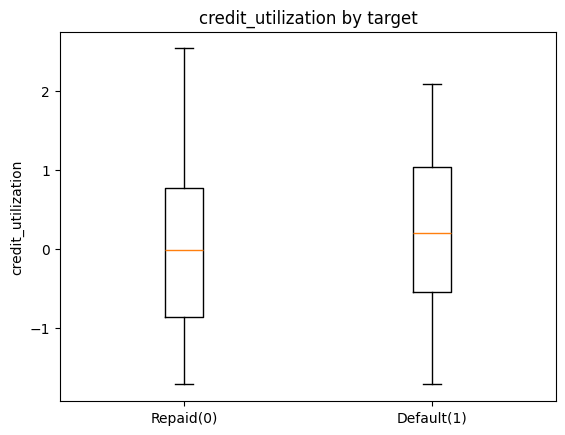

/tmp/ipython-input-2095847711.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['Repaid(0)', 'Default(1)'])


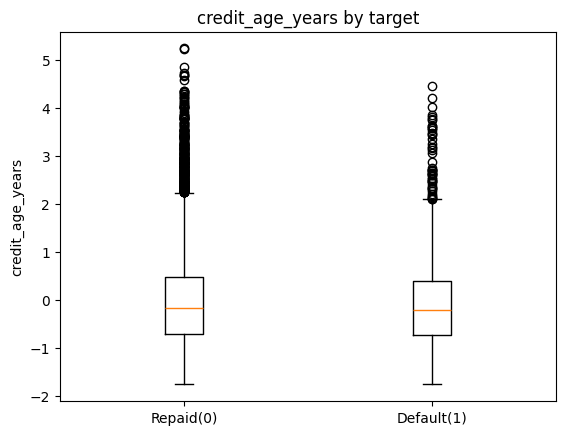

/tmp/ipython-input-2095847711.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['Repaid(0)', 'Default(1)'])


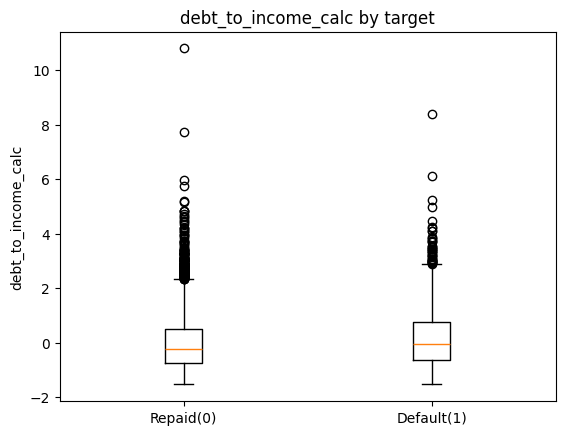

In [5]:
derived_cols = ['repayment_velocity_proxy','credit_utilization','credit_age_years','debt_to_income_calc']
derived_cols = [c for c in derived_cols if c in df.columns and 'target_default' in df.columns]
for col in derived_cols:
    fig, ax = plt.subplots()
    data0 = df[df['target_default']==0][col].dropna()
    data1 = df[df['target_default']==1][col].dropna()
    ax.boxplot([data0, data1], labels=['Repaid(0)', 'Default(1)'])
    ax.set_title(f'{col} by target')
    ax.set_ylabel(col)
    plt.show()


## 4 — Correlation matrix

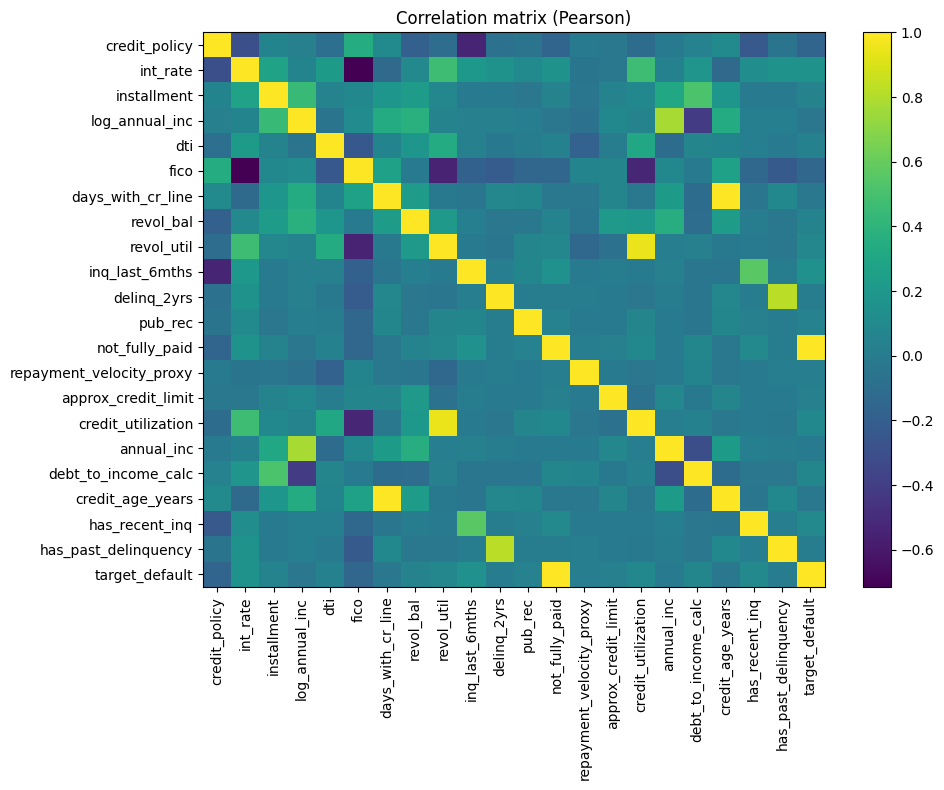


Top absolute correlations with target_default:


,target_default
not_fully_paid,1.000000
int_rate,0.159552
credit_policy,0.158119
fico,0.149666
inq_last_6mths,0.149452
has_recent_inq,0.091012
credit_utilization,0.085160
revol_util,0.082088
debt_to_income_calc,0.074137
revol_bal,0.053699


In [6]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr, interpolation='nearest', aspect='auto')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
ax.set_title('Correlation matrix (Pearson)')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

if 'target_default' in corr.columns:
    target_corr = corr['target_default'].drop('target_default').abs().sort_values(ascending=False)
    print('\nTop absolute correlations with target_default:')
    display(target_corr.head(10))


## 5 — Categorical feature analysis (loan purpose)

,purpose_col,count,defaults,default_rate
2,purpose_small_business,619,172,0.277868
1,purpose_educational,343,69,0.201166
0,purpose_debt_consolidation,3957,603,0.152388


/tmp/ipython-input-2620085996.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(purpose_df['purpose_col'], rotation=90)


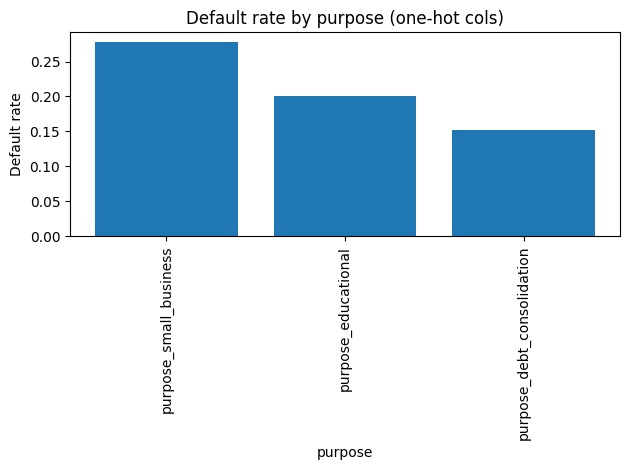

In [7]:
if any([c.startswith('purpose_') for c in df.columns]):
    purpose_cols = [c for c in df.columns if c.startswith('purpose_')]
    purpose_summary = []
    for c in purpose_cols:
        total = df[c].sum()
        defaults = int(df.loc[df[c]==1, 'target_default'].sum()) if 'target_default' in df.columns else 0
        rate = defaults / total if total>0 else np.nan
        purpose_summary.append((c, int(total), defaults, rate))
    purpose_df = pd.DataFrame(purpose_summary, columns=['purpose_col','count','defaults','default_rate']).sort_values('default_rate', ascending=False)
    display(purpose_df)
    fig, ax = plt.subplots()
    ax.bar(purpose_df['purpose_col'], purpose_df['default_rate'])
    ax.set_title('Default rate by purpose (one-hot cols)')
    ax.set_xlabel('purpose')
    ax.set_ylabel('Default rate')
    ax.set_xticklabels(purpose_df['purpose_col'], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print('No one-hot purpose columns detected.')


## 6 — Aggregate statistics by target

target_default,0,1
fico,0.065333,-0.342859
dti,-0.016309,0.085589
installment,-0.021807,0.114439
revol_bal,-0.023441,0.123016
revol_util,-0.035833,0.188049
repayment_velocity_proxy,-0.007741,0.040622
credit_utilization,-0.037174,0.195087
credit_age_years,0.012763,-0.066976
debt_to_income_calc,-0.032363,0.169836


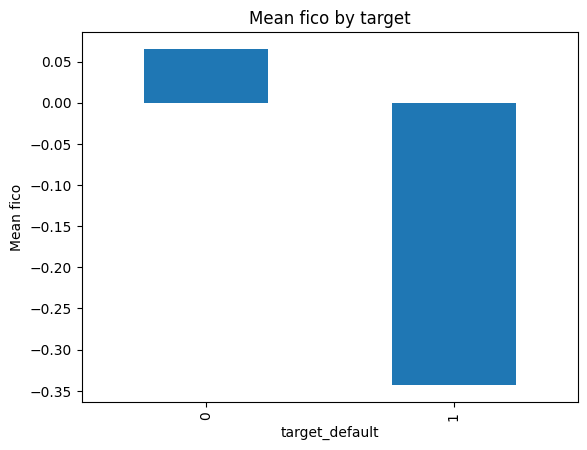

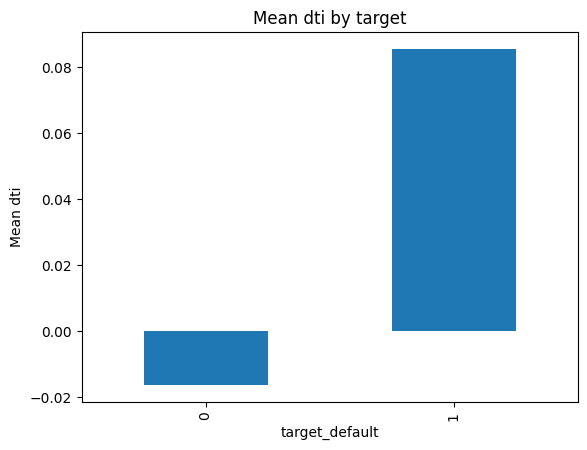

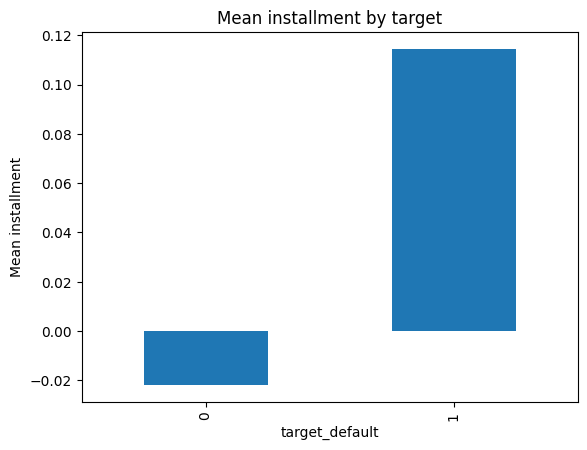

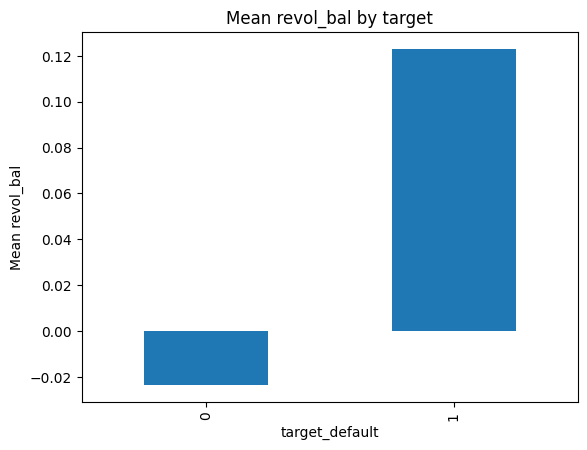

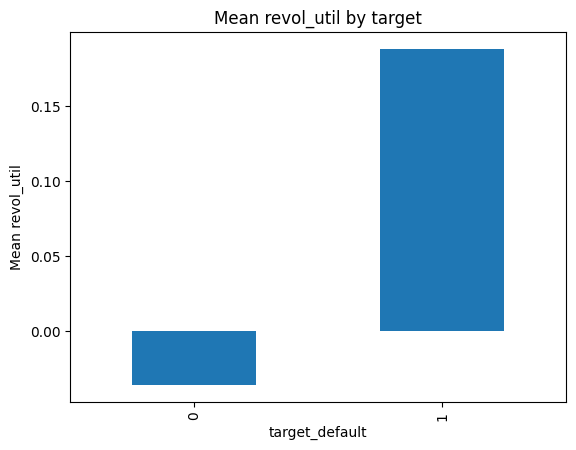

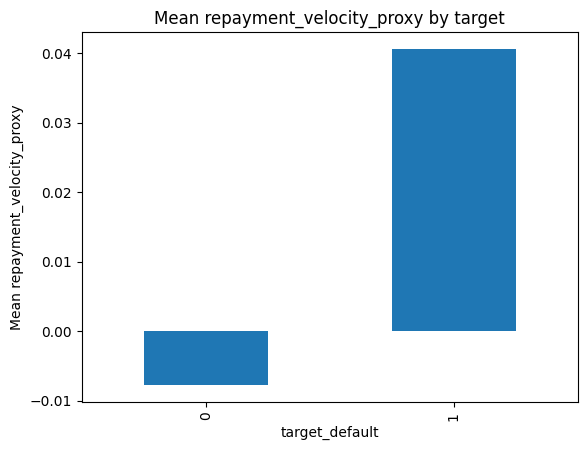

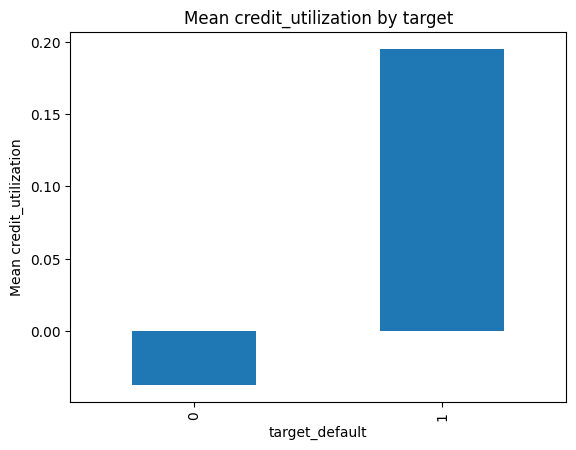

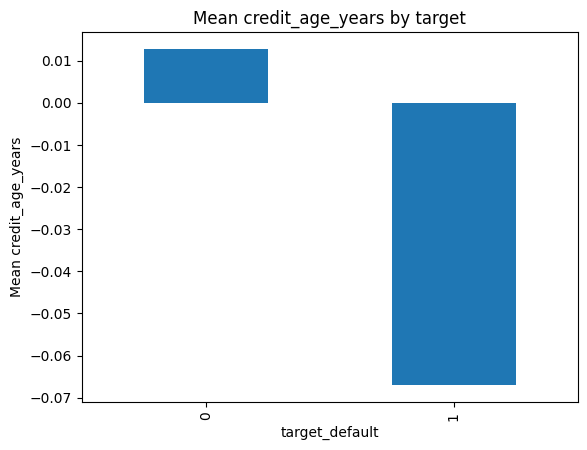

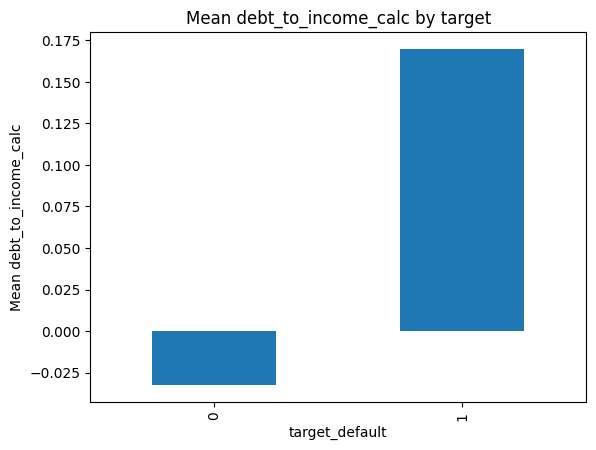

In [8]:
key_cols = [c for c in ['fico','dti','installment','revol_bal','revol_util','repayment_velocity_proxy','credit_utilization','credit_age_years','debt_to_income_calc'] if c in df.columns]
if 'target_default' in df.columns:
    agg = df.groupby('target_default')[key_cols].mean().T
    display(agg)
    for col in key_cols:
        fig, ax = plt.subplots()
        means = df.groupby('target_default')[col].mean()
        means.plot(kind='bar', ax=ax)
        ax.set_title(f'Mean {col} by target')
        ax.set_xlabel('target_default')
        ax.set_ylabel(f'Mean {col}')
        plt.show()
else:
    print('No target_default column; cannot compute aggregates.')


## 7 — Quick outlier detection

In [9]:
outlier_report = []
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_report.append((col, int(outliers), int(df[col].shape[0])))
outlier_df = pd.DataFrame(outlier_report, columns=['col','outlier_count','total'])
display(outlier_df)


,col,outlier_count,total
0,fico,6,9578
1,dti,0,9578
2,installment,236,9578
3,revol_bal,780,9578
4,revol_util,0,9578
5,repayment_velocity_proxy,1214,9578
6,credit_utilization,0,9578
7,credit_age_years,346,9578
8,debt_to_income_calc,224,9578


## 8 — Save EDA summary

In [11]:
summary_stats = df.describe().T
corr = df.select_dtypes(include=[np.number]).corr()
summary_stats.to_csv('/content/eda_summary_stats.csv')
corr.to_csv('/content/eda_correlations.csv')
print('Saved eda_summary_stats.csv and eda_correlations.csv to /mnt/data')


Saved eda_summary_stats.csv and eda_correlations.csv to /mnt/data


## Conclusion & next steps

- Review plots for skew and feature-target relationships.
- Consider log-transforming skewed features or using robust models.
- Address class imbalance if needed.
- Use feature importance and SHAP for model explainability.

Export as HTML/PDF for presentations.